In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("train.csv")
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df.shape

(20758, 18)

In [ ]:
df[['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']] = np.round(df[['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']])

In [ ]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.0,3.0,Sometimes,no,3.0,no,0.0,1.0,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.0,3.0,Frequently,no,2.0,no,1.0,1.0,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,2.0,1.0,Sometimes,no,2.0,no,1.0,2.0,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,3.0,2.0,Sometimes,no,2.0,no,2.0,1.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [ ]:
df['BMI'] = df['Weight']/ (df['Height']**2)

df[['BMI', 'NObeyesdad']]

,BMI,NObeyesdad
0,28.259565,Overweight_Level_II
1,23.422091,Normal_Weight
2,17.126706,Insufficient_Weight
3,44.855798,Obesity_Type_III
4,25.599151,Overweight_Level_II
...,...,...
20753,36.587084,Obesity_Type_II
20754,17.099278,Insufficient_Weight
20755,31.889841,Obesity_Type_II
20756,28.899693,Overweight_Level_II


In [ ]:
df[['BMI', 'NObeyesdad']].groupby('NObeyesdad').mean()

,BMI
NObeyesdad,
Insufficient_Weight,17.583619
Normal_Weight,22.000999
Obesity_Type_I,32.154649
Obesity_Type_II,36.521958
Obesity_Type_III,41.781745
Overweight_Level_I,26.059270
Overweight_Level_II,28.192491


In [ ]:
df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.449802,2.764958,2.054581,0.985548,0.624771,30.241842
std,5992.46278,5.688072,0.087312,26.379443,0.565896,0.722398,0.681172,0.867857,0.655701,8.333932
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.868541
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,2.000000,0.000000,0.000000,24.088223
50%,10378.50000,22.815416,1.700000,84.064875,2.000000,3.000000,2.000000,1.000000,1.000000,29.384757
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,3.000000,2.000000,1.000000,37.011168
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000,54.997991


In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad',
       'BMI'],
      dtype='object')

**UNIVARIATE**

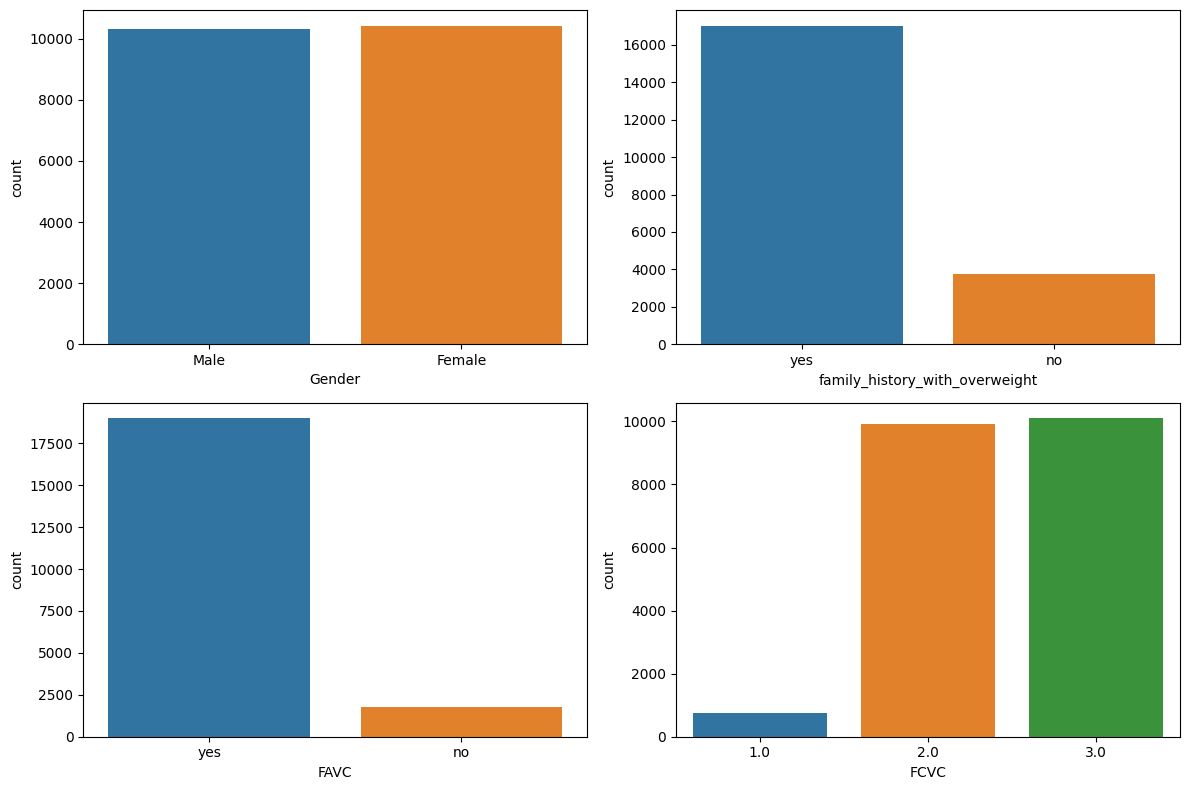

In [ ]:
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
sns.countplot(data=df, x='Gender', ax=axes[0][0])
sns.countplot(data=df, x='family_history_with_overweight', ax=axes[0][1])
sns.countplot(data=df, x='FAVC', ax=axes[1][0])
sns.countplot(data=df, x='FCVC', ax=axes[1][1]);

plt.tight_layout()

1) Males and Females are equally distributed

2) There are more people with overweight

3) There are a lot of people who consume high calorie food

4) Very few people do not consume vegetables

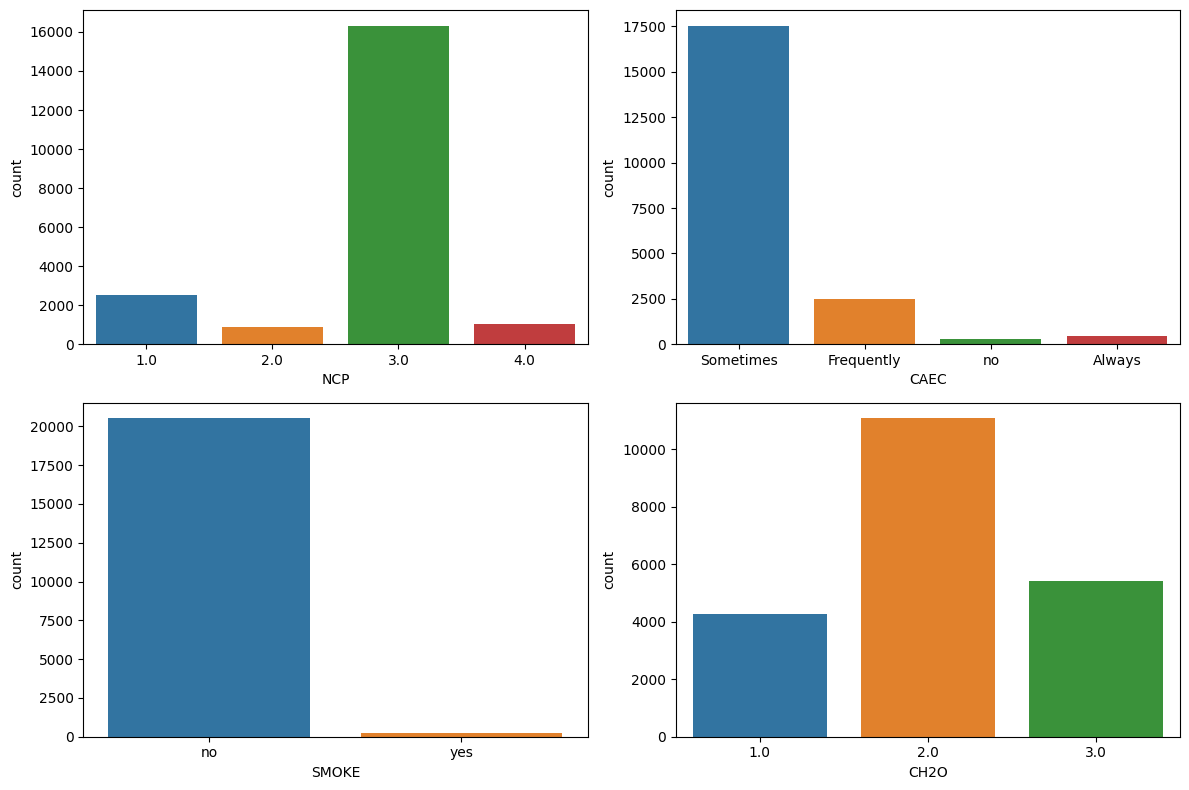

In [ ]:
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
sns.countplot(data=df, x='NCP', ax=axes[0][0])
sns.countplot(data=df, x='CAEC', ax=axes[0][1])
sns.countplot(data=df, x='SMOKE', ax=axes[1][0])
sns.countplot(data=df, x='CH2O', ax=axes[1][1]);

plt.tight_layout()

1) A lot of people consume main meals more than 3 times a day

2) Very few people somke in this dataset

3) A lot of people consume water between 1 to 2 Liters

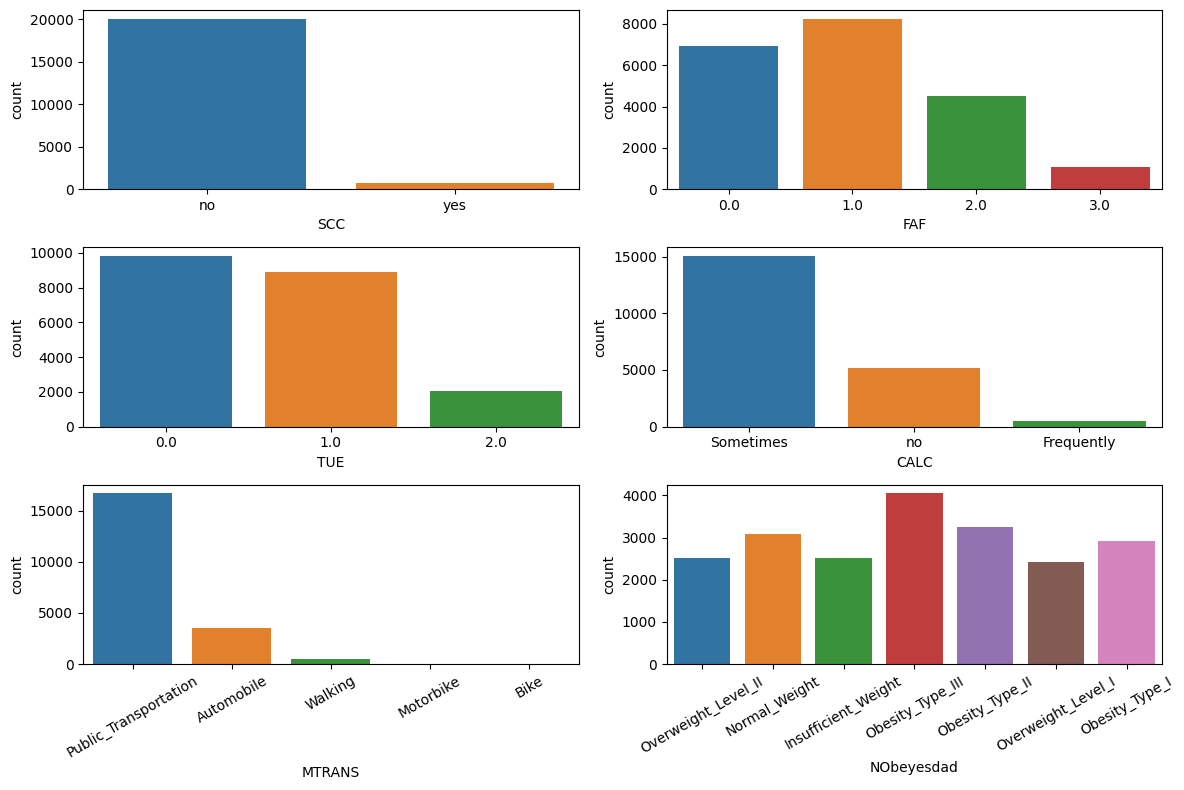

In [ ]:
_, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
sns.countplot(data=df, x='SCC', ax=axes[0][0])
sns.countplot(data=df, x='FAF', ax=axes[0][1])
sns.countplot(data=df, x='TUE', ax=axes[1][0])
sns.countplot(data=df, x='CALC', ax=axes[1][1])
sns.countplot(data=df, x='MTRANS', ax=axes[2][0])
sns.countplot(data=df, x='NObeyesdad', ax=axes[2][1])
# axes[2][0].set_xticklabels(axes[2][0].get_xticks(), rotation = 45)
axes[2][0].tick_params(axis='x',rotation=30)
axes[2][1].tick_params(axis='x',rotation=30)


plt.tight_layout()

1) Very few people keep track of their calorie intake.

2) FAF - (0 = never, 1 = once or twice a week, 2 = two or three times a week, 3 = four or five times a week) More than 55% tend to do some physical activity atleast once a week.

3) TUE - (0 = less than an hour, 1 = between one and three hours, 2 = more than three hours)  Very few use eloctronic devices for more than 3 hours

4) CALC - Lot of people consume alcohol occasionally.

5) MTRANS - Lot of people heavily rely on public transport.

In [ ]:
df['NObeyesdad'].value_counts(normalize=True)

NObeyesdad
Obesity_Type_III       0.194913
Obesity_Type_II        0.156470
Normal_Weight          0.148473
Obesity_Type_I         0.140187
Insufficient_Weight    0.121544
Overweight_Level_II    0.121495
Overweight_Level_I     0.116919
Name: proportion, dtype: float64

In [ ]:
bins = [0, 20, 25, 30, 80]
labels=['0-20', '21-25', '26-30', '30+']
df['age_group_1'] = pd.Series(pd.cut(df['Age'], bins=bins, labels=labels))

bins = [0, 20, 23, 30, 80]
labels=['0-20', '21-25', '26-30', '30+']
df['age_group_1'] = pd.Series(pd.cut(df['Age'], bins=bins, labels=labels))

# df['age_group_1'] = pd.Series(pd.cut(df['Age'], bins=bins, labels=labels).value_counts())

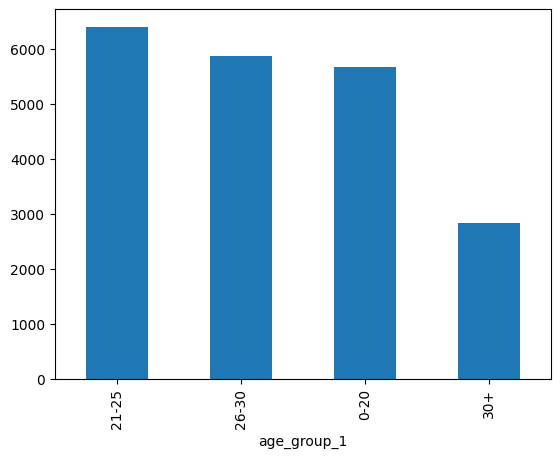

In [ ]:
df['age_group_1'].value_counts().plot(kind='bar');

<Axes: xlabel='Weight'>

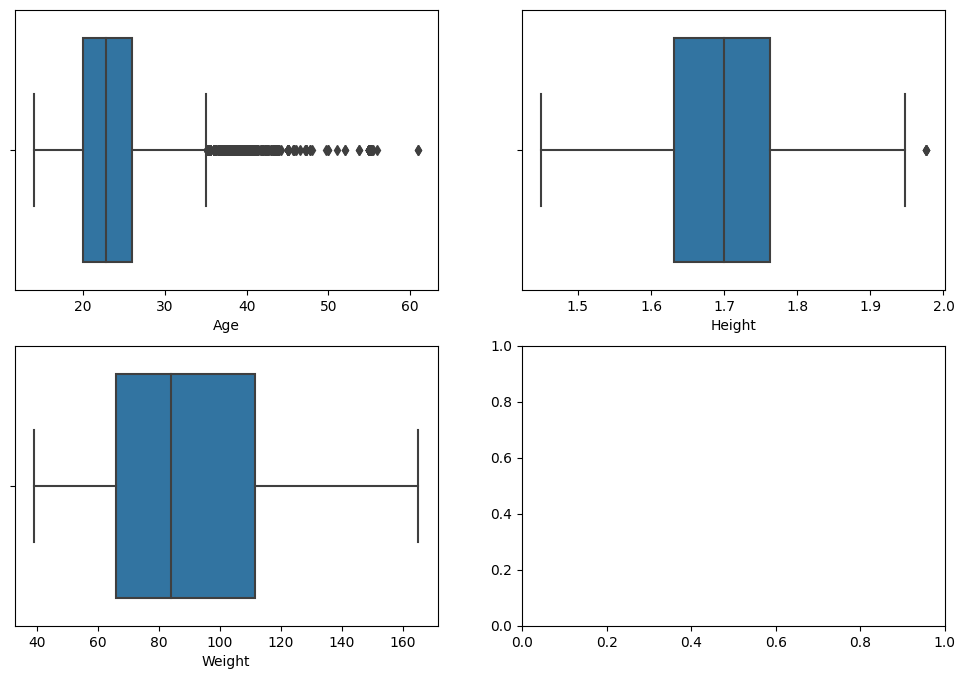

In [ ]:
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
sns.boxplot(data=df, x='Age', ax=axes[0][0])
sns.boxplot(data=df, x='Height', ax=axes[0][1])
sns.boxplot(data=df, x='Weight', ax=axes[1][0])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weight', ylabel='Density'>

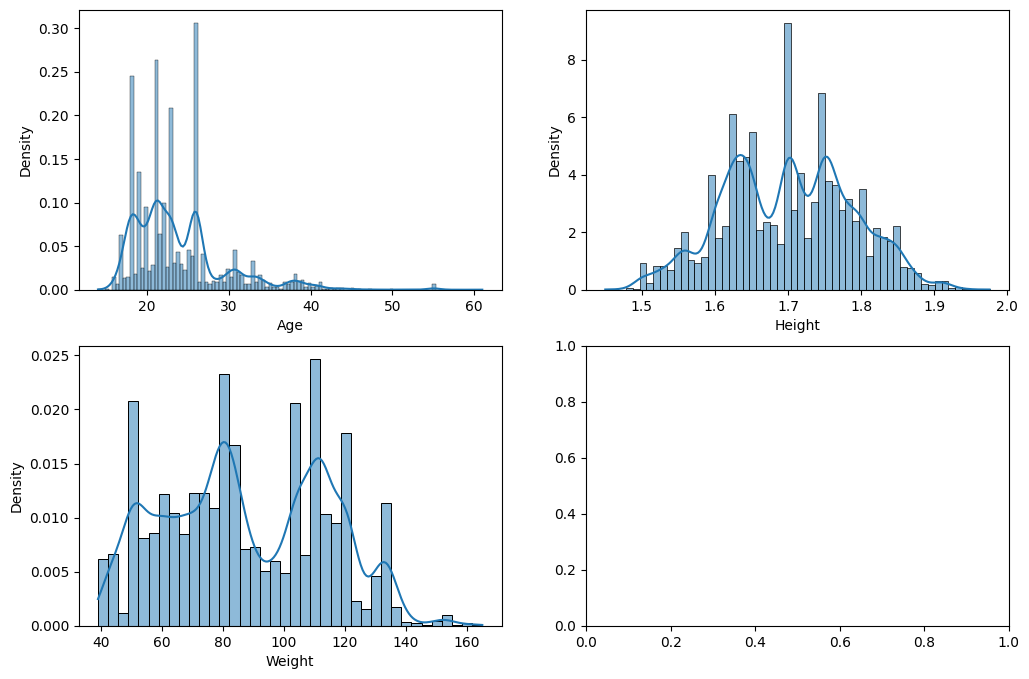

In [ ]:
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
sns.histplot(data=df, x='Age', kde=True, stat="density", ax=axes[0][0])
sns.histplot(data=df, x='Height', kde=True, stat="density", ax=axes[0][1])
sns.histplot(data=df, x='Weight', kde=True, stat="density", ax=axes[1][0])

In [ ]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,age_group_1
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.0,3.0,Sometimes,no,3.0,no,0.0,1.0,Sometimes,Public_Transportation,Overweight_Level_II,28.259565,26-30
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.0,3.0,Frequently,no,2.0,no,1.0,1.0,no,Automobile,Normal_Weight,23.422091,0-20
2,2,Female,18.000000,1.711460,50.165754,yes,yes,2.0,1.0,Sometimes,no,2.0,no,1.0,2.0,no,Public_Transportation,Insufficient_Weight,17.126706,0-20
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III,44.855798,21-25
4,4,Male,31.641081,1.914186,93.798055,yes,yes,3.0,2.0,Sometimes,no,2.0,no,2.0,1.0,Sometimes,Public_Transportation,Overweight_Level_II,25.599151,30+


In [ ]:
df[['NObeyesdad', 'Age']].groupby('NObeyesdad').mean()

,Age
NObeyesdad,
Insufficient_Weight,19.336502
Normal_Weight,20.801388
Obesity_Type_I,25.023615
Obesity_Type_II,27.707128
Obesity_Type_III,24.126847
Overweight_Level_I,23.045197
Overweight_Level_II,26.032084


People with age in 19, 20 do not suffer with overweight/ obesity problems. While, people in the age range 23 and above suffer with obesity/ overweight problems

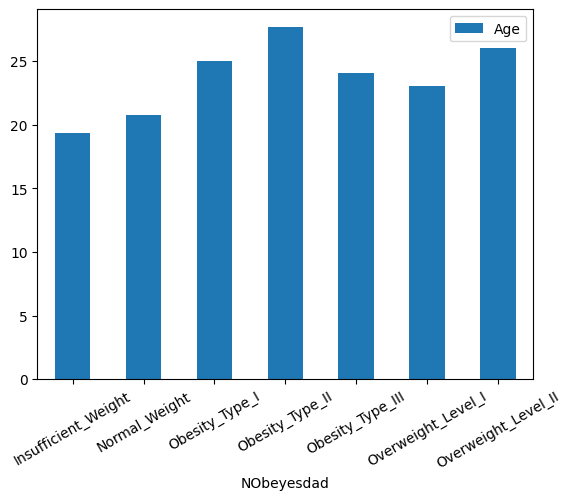

In [ ]:
df[['NObeyesdad', 'Age']].groupby('NObeyesdad').mean().plot(kind='bar');
plt.xticks(rotation=30);

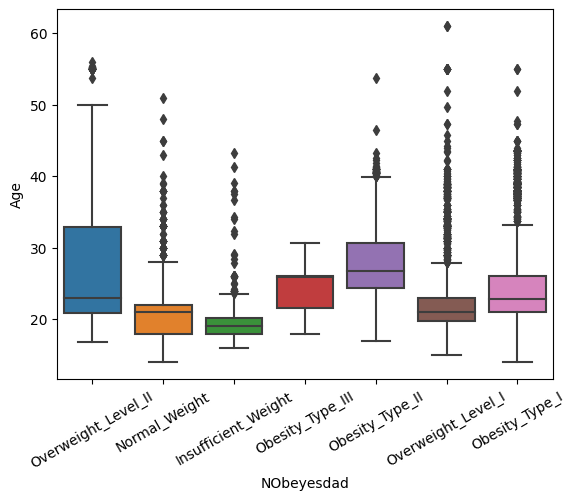

In [ ]:
sns.boxplot(data=df, x='NObeyesdad', y='Age')
plt.xticks(rotation=30);

**Reoprt on Univariate analysis:**

**BIVARIATE ANALYSIS**


1) Quant vs Quant - Height, Weight, Age -------- plots (correlation, scatter, heatmap) <br>
2) Quant vs Target - Ht, Wt, Age vs Obese plots ---------- plots (box)


3) Cat vs Cat -  ---------- plots (countplot hue, contingency table) <br>
4) Cat vs Target - vs Obese

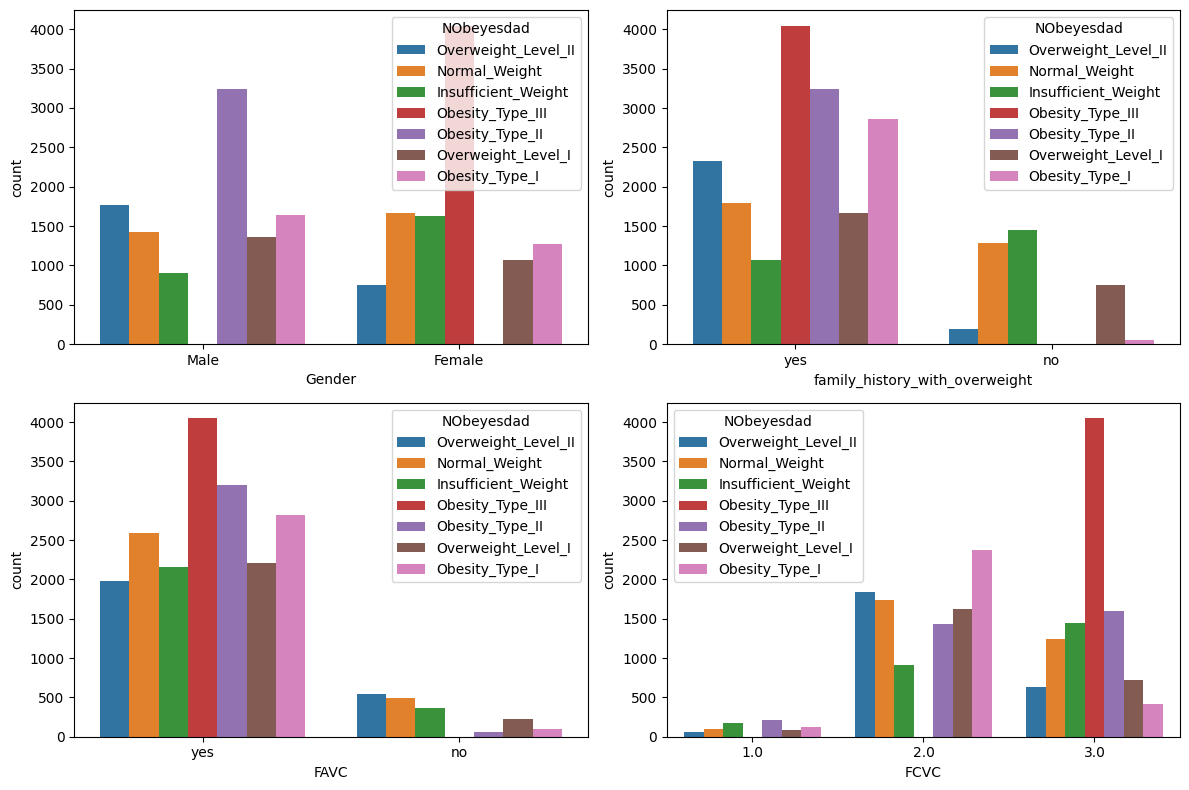

In [ ]:
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
sns.countplot(data=df, x='Gender', hue='NObeyesdad', ax=axes[0][0])
sns.countplot(data=df, x='family_history_with_overweight', hue='NObeyesdad', ax=axes[0][1])
sns.countplot(data=df, x='FAVC', hue='NObeyesdad', ax=axes[1][0])
sns.countplot(data=df, x='FCVC', hue='NObeyesdad', ax=axes[1][1]);

plt.tight_layout()

In [ ]:
pd.crosstab(df["Gender"], df["NObeyesdad"], margins=True, normalize = True)*100

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II,All
Gender,,,,,,,,
Female,7.809037,7.996917,6.103671,0.038539,19.467193,5.154639,3.637152,50.207149
Male,4.345313,6.850371,7.915021,15.608440,0.024087,6.537239,8.512381,49.792851
All,12.154350,14.847288,14.018692,15.646979,19.491280,11.691878,12.149533,100.000000


It can be seen that, Males rarely suffer with Obesity type-III while females rarely suffer with Obesity Type-II

In [ ]:
pd.crosstab(df["family_history_with_overweight"], df["NObeyesdad"], margins=True, normalize = True)*100

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II,All
family_history_with_overweight,,,,,,,,
no,6.980441,6.224106,0.231236,0.024087,0.004817,3.641969,0.929762,18.03642
yes,5.173909,8.623181,13.787455,15.622892,19.486463,8.049908,11.219771,81.96358
All,12.154350,14.847288,14.018692,15.646979,19.491280,11.691878,12.149533,100.00000


It can be seen that, almost 69% of Obese/ Overweight people (all types) have some family history with overweight.

In [ ]:
pd.crosstab(df["FAVC"], df["NObeyesdad"], margins=True, normalize = True)*100

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II,All
FAVC,,,,,,,,
no,1.782445,2.384623,0.448020,0.260141,0.004817,1.079102,2.596589,8.555738
yes,10.371905,12.462665,13.570672,15.386839,19.486463,10.612776,9.552943,91.444262
All,12.154350,14.847288,14.018692,15.646979,19.491280,11.691878,12.149533,100.000000


It can be see that, 70% of people in the Obese/ Overweight category (all types) tend to consume high calorie food

In [ ]:
pd.crosstab(df["FCVC"], df["NObeyesdad"], margins=True, normalize = True)* 100

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II,All
FCVC,,,,,,,,
1.0,0.823779,0.462472,0.621447,1.050198,0.00000,0.414298,0.264958,3.637152
2.0,4.383852,8.391945,11.407650,6.898545,0.00000,7.809037,8.854418,47.745448
3.0,6.946719,5.992870,1.989594,7.698237,19.49128,3.468542,3.030157,48.617401
All,12.154350,14.847288,14.018692,15.646979,19.49128,11.691878,12.149533,100.000000


1-Never; 2-Sometimes; 3-Always

It can be observed that, almost 36% of the people who eat excessive veggies are suffering with Obesity or Overweight

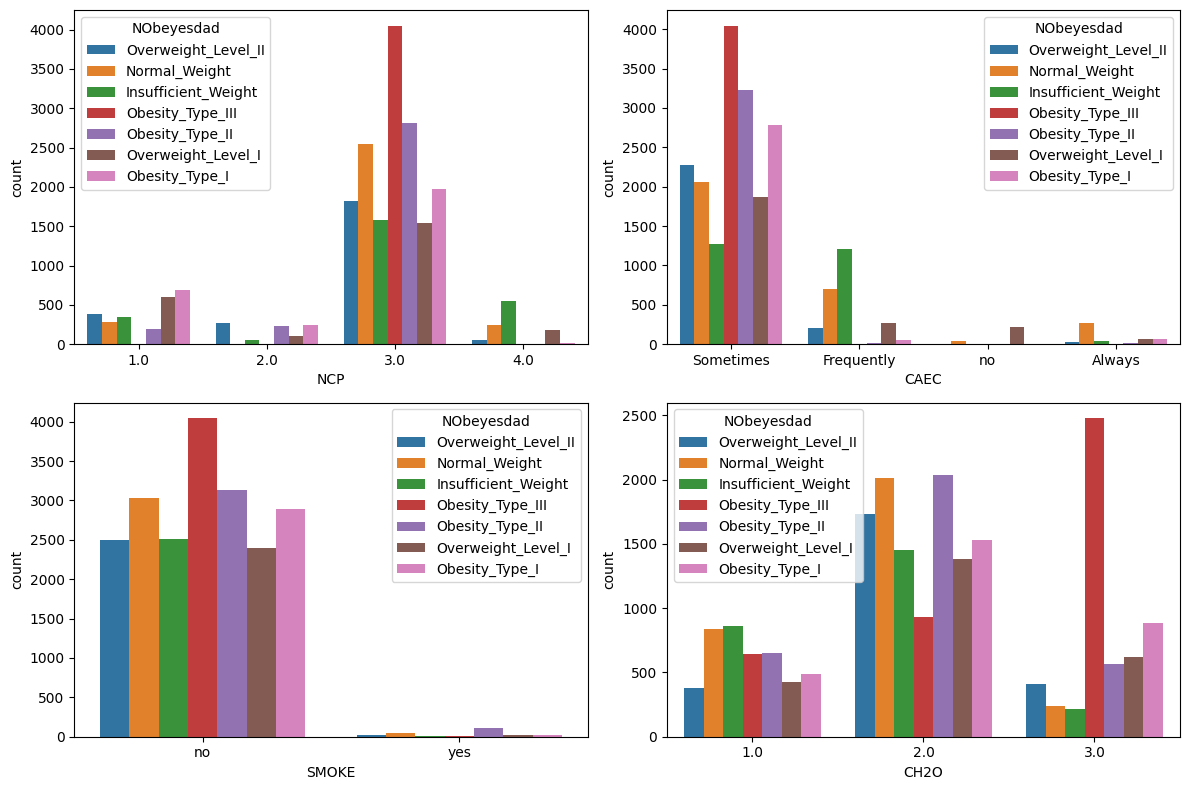

In [ ]:
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
sns.countplot(data=df, x='NCP', hue='NObeyesdad',ax=axes[0][0])
sns.countplot(data=df, x='CAEC', hue='NObeyesdad', ax=axes[0][1])
sns.countplot(data=df, x='SMOKE', hue='NObeyesdad', ax=axes[1][0])
sns.countplot(data=df, x='CH2O', hue='NObeyesdad', ax=axes[1][1]);

plt.tight_layout()


In [ ]:
pd.crosstab(df["NCP"], df["NObeyesdad"], margins=True, normalize = True)* 100

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II,All
NCP,,,,,,,,
1.0,1.676462,1.382599,3.309567,0.944214,0.00000,2.904904,1.873976,12.091724
2.0,0.260141,0.028905,1.151363,1.132094,0.00000,0.486559,1.271799,4.330860
3.0,7.582619,12.279603,9.485500,13.527315,19.49128,7.447731,8.753252,78.567299
4.0,2.635129,1.156181,0.072261,0.043357,0.00000,0.852683,0.250506,5.010117
All,12.154350,14.847288,14.018692,15.646979,19.49128,11.691878,12.149533,100.000000


It can be observed that 78% of the people eat more than 3 main meals a day, out of which 75% suffer with obesity or overweight

In [ ]:
pd.crosstab(df["CAEC"], df["NObeyesdad"], margins=True, normalize = True)* 100

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II,All
CAEC,,,,,,,,
Always,0.168610,1.324790,0.308315,0.048174,0.004817,0.289045,0.158975,2.302727
Frequently,5.838713,3.401098,0.269776,0.057809,0.014452,1.315156,1.011658,11.908662
Sometimes,6.108488,9.947972,13.402062,15.531361,19.472011,9.032662,10.949995,84.444551
no,0.038539,0.173427,0.038539,0.009635,0.000000,1.055015,0.028905,1.344060
All,12.154350,14.847288,14.018692,15.646979,19.491280,11.691878,12.149533,100.000000


In [ ]:
pd.crosstab(df["SMOKE"], df["NObeyesdad"], margins=True, normalize = True)* 100

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II,All
SMOKE,,,,,,,,
no,12.120628,14.625686,13.903074,15.097794,19.472011,11.571442,12.029097,98.819732
yes,0.033722,0.221601,0.115618,0.549186,0.019270,0.120435,0.120435,1.180268
All,12.154350,14.847288,14.018692,15.646979,19.491280,11.691878,12.149533,100.000000


Almost 99% of the people do not smoke

In [ ]:
pd.crosstab(df["CH2O"], df["NObeyesdad"], margins=True, normalize = True)* 100

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II,All
CH2O,,,,,,,,
1.0,4.138164,4.022546,2.365353,3.121688,3.087966,2.061856,1.820985,20.618557
2.0,6.975624,9.678196,7.375470,9.808267,4.480200,6.643222,8.343771,53.304750
3.0,1.040563,1.146546,4.277869,2.717025,11.923114,2.986800,1.984777,26.076693
All,12.154350,14.847288,14.018692,15.646979,19.491280,11.691878,12.149533,100.000000


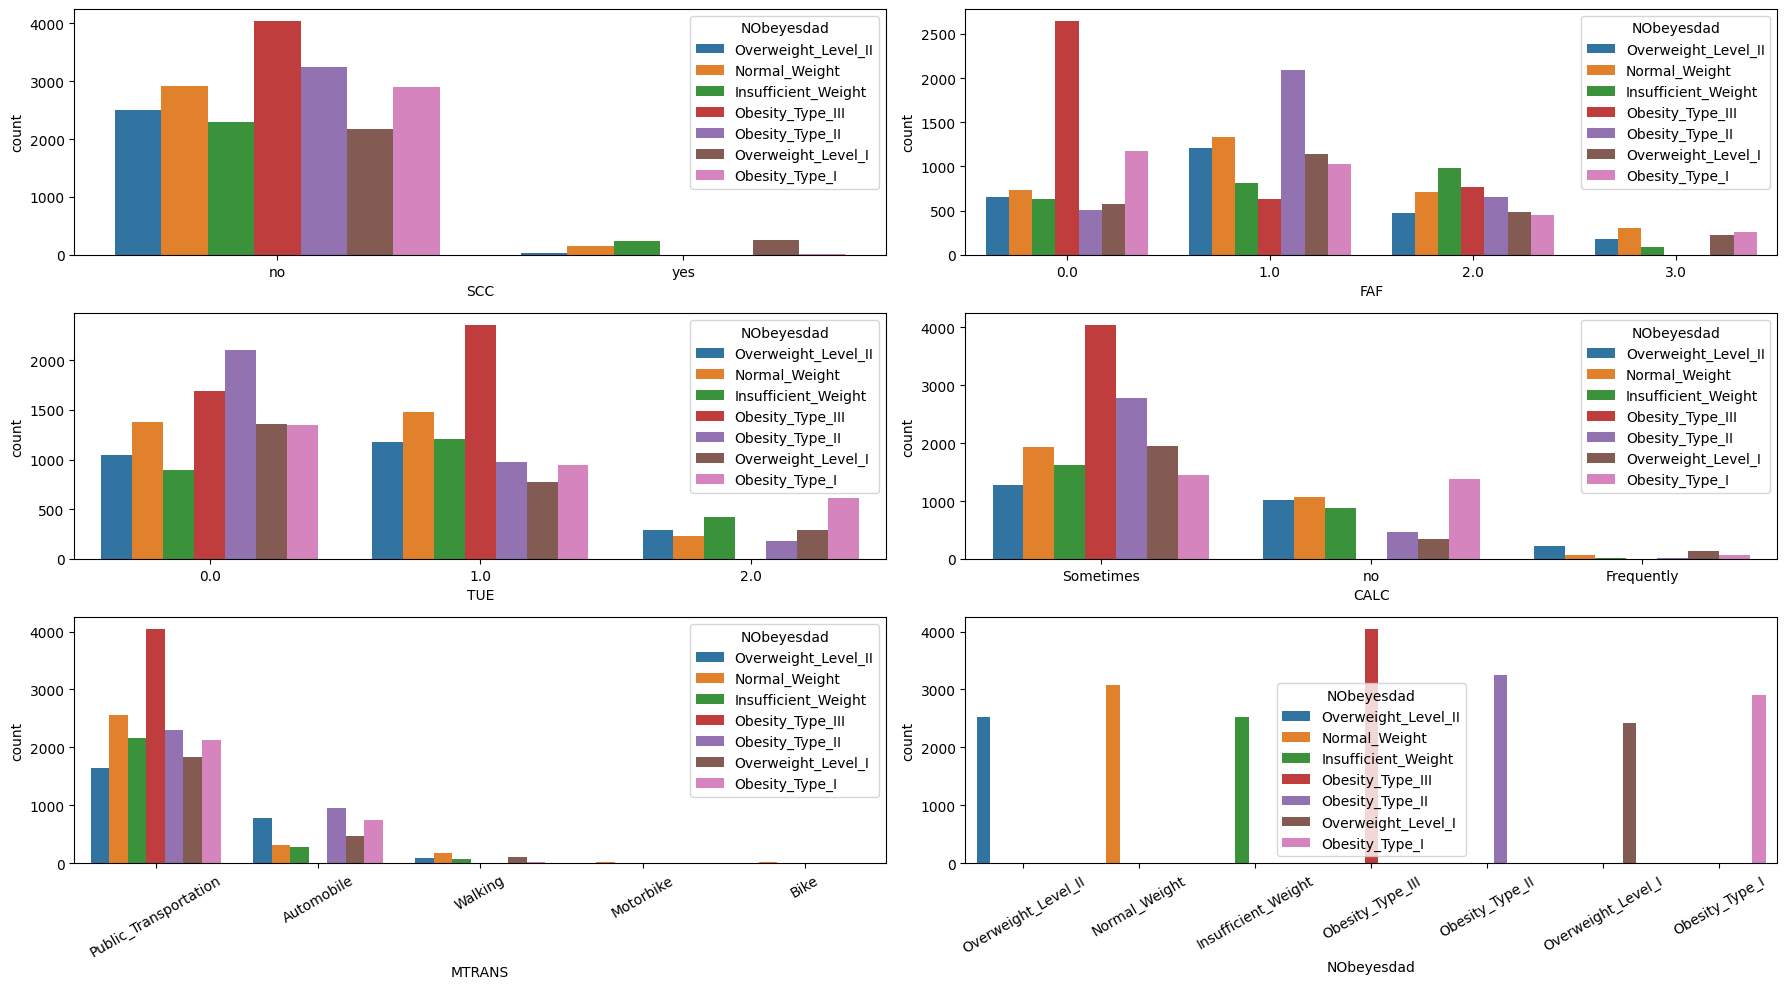

In [ ]:

_, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 10))
sns.countplot(data=df, x='SCC', hue='NObeyesdad',ax=axes[0][0])
sns.countplot(data=df, x='FAF', hue='NObeyesdad',ax=axes[0][1])
sns.countplot(data=df, x='TUE', hue='NObeyesdad',ax=axes[1][0])
sns.countplot(data=df, x='CALC', hue='NObeyesdad', ax=axes[1][1])
sns.countplot(data=df, x='MTRANS', hue='NObeyesdad', ax=axes[2][0])
sns.countplot(data=df, x='NObeyesdad', hue='NObeyesdad', ax=axes[2][1])
# axes[2][0].set_xticklabels(axes[2][0].get_xticks(), rotation = 45)
axes[2][0].tick_params(axis='x',rotation=30)
axes[2][1].tick_params(axis='x',rotation=30)


plt.tight_layout()

In [ ]:
pd.crosstab(df["SCC"], df["NObeyesdad"], margins=True, normalize = True)* 100

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II,All
SCC,,,,,,,,
no,11.036709,14.076501,13.931978,15.627710,19.49128,10.492340,12.033915,96.690433
yes,1.117641,0.770787,0.086714,0.019270,0.00000,1.199538,0.115618,3.309567
All,12.154350,14.847288,14.018692,15.646979,19.49128,11.691878,12.149533,100.000000


People who don't track their calorie intake tend to suffer from obesity/overweight issues

In [ ]:
pd.crosstab(df["FAF"], df["NObeyesdad"], margins=True, normalize = True)* 100

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II,All
FAF,,,,,,,,
0.0,3.068696,3.511899,5.660468,2.418345,12.761345,2.774834,3.145775,33.341362
1.0,3.935832,6.445708,4.961942,10.078042,3.034974,5.511128,5.843530,39.811157
2.0,4.721071,3.449273,2.153387,3.140958,3.690144,2.350901,2.293092,21.798825
3.0,0.428750,1.440409,1.242894,0.009635,0.004817,1.055015,0.867136,5.048656
All,12.154350,14.847288,14.018692,15.646979,19.491280,11.691878,12.149533,100.000000


Just over 25% of the people perform some physical activity. We can see only 3% of people suffer with obesity, that perform physical activity more than 5 times a week.

In [ ]:
pd.crosstab(df["TUE"], df["NObeyesdad"], margins=True, normalize = True)* 100

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II,All
TUE,,,,,,,,
0.0,4.306773,6.619135,6.503517,10.116582,8.136622,6.561326,5.053473,47.297427
1.0,5.814626,7.100877,4.576549,4.677715,11.345024,3.733500,5.679738,42.928028
2.0,2.032951,1.127276,2.938626,0.852683,0.009635,1.397052,1.416321,9.774545
All,12.154350,14.847288,14.018692,15.646979,19.491280,11.691878,12.149533,100.000000


In [ ]:
pd.crosstab(df["CALC"], df["NObeyesdad"], margins=True, normalize = True)* 100

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II,All
CALC,,,,,,,,
Frequently,0.067444,0.327585,0.366124,0.062626,0.00000,0.626265,1.098372,2.548415
Sometimes,7.804220,9.345794,6.956354,13.377975,19.49128,9.442143,6.161480,72.579247
no,4.282686,5.173909,6.696214,2.206378,0.00000,1.623470,4.889681,24.872338
All,12.154350,14.847288,14.018692,15.646979,19.49128,11.691878,12.149533,100.000000


3/4th of the population consume alcohol

In [ ]:
pd.crosstab(df["MTRANS"], df["NObeyesdad"], margins=True, normalize = True)* 100

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II,All
MTRANS,,,,,,,,
Automobile,1.334425,1.488583,3.598613,4.547644,0.00000,2.288274,3.767222,17.024762
Bike,0.009635,0.067444,0.009635,0.004817,0.00000,0.043357,0.019270,0.154157
Motorbike,0.019270,0.081896,0.019270,0.014452,0.00000,0.033722,0.014452,0.183062
Public_Transportation,10.434531,12.356682,10.270739,11.051161,19.49128,8.839965,7.943925,80.388284
Walking,0.356489,0.852683,0.120435,0.028905,0.00000,0.486559,0.404663,2.249735
All,12.154350,14.847288,14.018692,15.646979,19.49128,11.691878,12.149533,100.000000


Hardly 2% of the people walk. Others use some mode of transport for commute

In [ ]:
df[['BMI', 'Gender']].groupby('Gender').mean()

,BMI
Gender,
Female,31.001055
Male,29.476312


BMI is relatively more in Females than Males

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


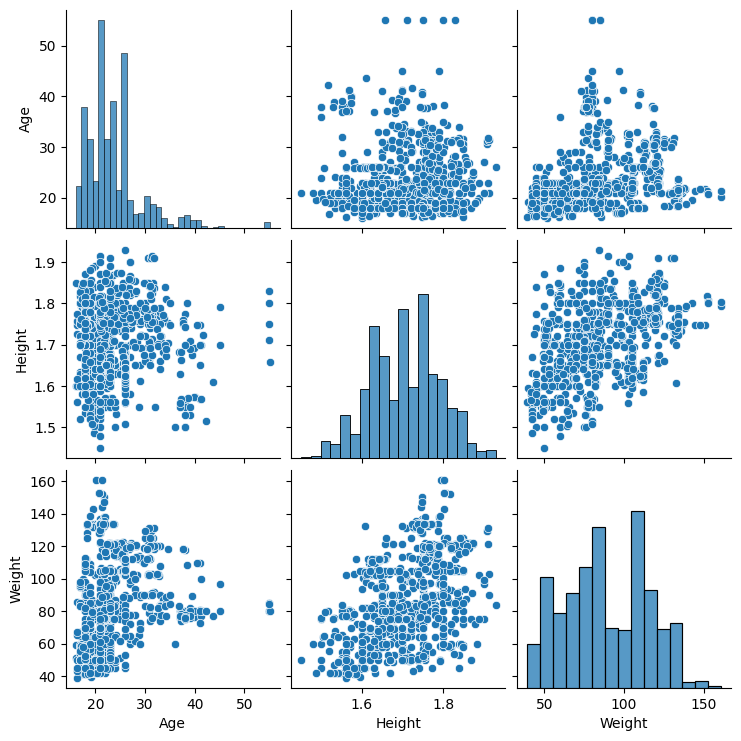

In [ ]:
sns.pairplot(data=df[['Age', 'Height', 'Weight']].sample(frac=0.05))

In [ ]:
df[['Age', 'Height', 'Weight']].corr()

,Age,Height,Weight
Age,1.000000,-0.011713,0.283381
Height,-0.011713,1.000000,0.416677
Weight,0.283381,0.416677,1.000000


In [ ]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,age_group_1
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.0,3.0,Sometimes,no,3.0,no,0.0,1.0,Sometimes,Public_Transportation,Overweight_Level_II,28.259565,26-30
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.0,3.0,Frequently,no,2.0,no,1.0,1.0,no,Automobile,Normal_Weight,23.422091,0-20
2,2,Female,18.000000,1.711460,50.165754,yes,yes,2.0,1.0,Sometimes,no,2.0,no,1.0,2.0,no,Public_Transportation,Insufficient_Weight,17.126706,0-20
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III,44.855798,21-25
4,4,Male,31.641081,1.914186,93.798055,yes,yes,3.0,2.0,Sometimes,no,2.0,no,2.0,1.0,Sometimes,Public_Transportation,Overweight_Level_II,25.599151,30+


In [ ]:
ohe_features = list(set(df.columns) - set(['Age', 'Height', 'Weight', 'BMI', 'NObeyesdad', 'id', 'age_group_1', 'NObeyesdad_label']))
target_feature = ['NObeyesdad']
target_label_feature = ['NObeyesdad_label']
numerical_features = ['Age', 'Height', 'Weight']